# load the dataset :

In [1]:
import pandas as pd

# Load the data
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

# Add labels
fake['label'] = 0  # 0 for fake
real['label'] = 1  # 1 for real

# Combine datasets
df = pd.concat([fake, real], ignore_index=True)

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# Show basic info
df.info()
df.head()
df.dtypes
df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


(44898, 5)

In [2]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [3]:
# check null values
df.isnull()


,title,text,subject,date,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
44893,False,False,False,False,False
44894,False,False,False,False,False
44895,False,False,False,False,False
44896,False,False,False,False,False


In [4]:
df.isnull().sum().sum()

np.int64(0)

# exploratory data analysis (EDA)

In [5]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Basic stats
print(df['label'].value_counts())

title      0
text       0
subject    0
date       0
label      0
dtype: int64
Duplicates: 209
label
0    23481
1    21417
Name: count, dtype: int64


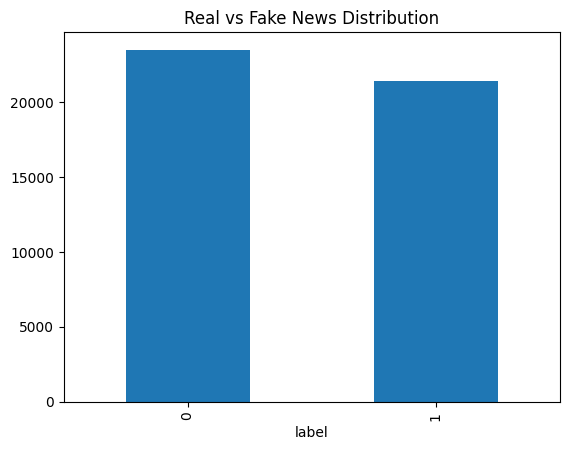

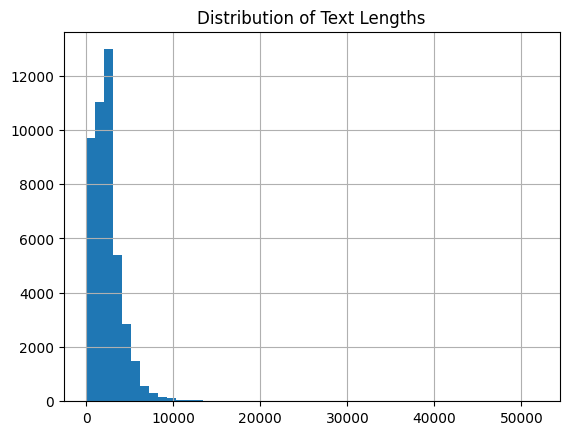

In [15]:
import matplotlib.pyplot as plt

# Check class distribution
df['label'].value_counts().plot(kind='bar')
plt.title("Real vs Fake News Distribution")
plt.show()

# Analyze text length
df['text_length'] = df['text'].apply(len)
df['text_length'].hist(bins=50)
plt.title("Distribution of Text Lengths")
plt.show()

In [6]:
df.dropna()

,title,text,subject,date,label
0,Betsy Devos Just Put A For-Profit Credit Card...,"On Tuesday, Education Secretary Betsy Devos an...",News,"June 21, 2017",0
1,Former Trump adviser Flynn pleads guilty to ly...,WASHINGTON (Reuters) - Former U.S. national se...,politicsNews,"December 1, 2017",1
2,RT EXCLUSIVE: Peter Lavelle interviews Dr. Ron...,"21st Century Wire says In 2008 and 2012, Ron P...",Middle-east,"November 12, 2016",0
3,Gingrich doesn't rule out Trump VP role,WASHINGTON (Reuters) - Republican veteran Newt...,politicsNews,"May 12, 2016",1
4,Russia's Lavrov and Tillerson talk Syria after...,MOSCOW (Reuters) - Russia s Foreign Ministry s...,worldnews,"September 17, 2017",1
...,...,...,...,...,...
44893,Kellyanne Conway: ‘Presidents aren’t judged by...,21st Century Wire says Kellyanne Conway thrash...,Middle-east,"January 23, 2017",0
44894,Trump Official Accidentally Leaks Plan To Ste...,Mexican President Enrique Pe a Nieto may not b...,News,"March 29, 2017",0
44895,NATO ships hold missile defense drill near Sco...,WASHINGTON (Reuters) - Warships from eight NAT...,worldnews,"October 16, 2017",1
44896,NOT GRASSROOTS: #Ferguson Protestors PAID Over...,The Ferguson #BlackLivesMatter protesters are ...,politics,"May 17, 2015",0


# text preprocessing (TF-IDF)

In [7]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Combine title and text
df['content'] = df['title'] + " " + df['text']

# Split features (X) and labels (y)
X = df['content']
y = df['label']

# Convert text to numbers using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


# training models:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Model 2: Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Logistic Regression Accuracy: 0.9864142538975501
Naive Bayes Accuracy: 0.9390868596881959


In [11]:
# compare results:
print("Logistic Regression Report:\n", classification_report(y_test, lr_pred))
print("Naive Bayes Report:\n", classification_report(y_test, nb_pred))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4659
           1       0.98      0.99      0.99      4321

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4659
           1       0.94      0.93      0.94      4321

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

